In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow as tf

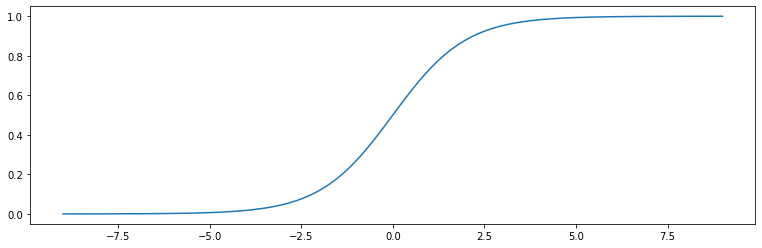

In [2]:
plt.rc('figure', figsize=(13, 4))
x = np.linspace(-9, 9, 10000)
plt.plot(x, tf.nn.sigmoid(x))

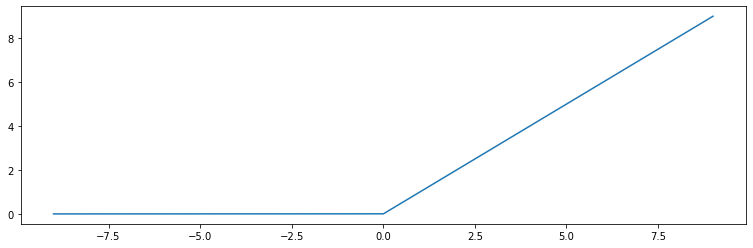

In [3]:
plt.plot(x, tf.nn.relu(x))

In [4]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

In [5]:
x = x_in = keras.Input(shape=[2])
x = keras.layers.Dense(3, activation='relu',
                       kernel_regularizer='l2',
                       bias_regularizer='l2')(x)
x = keras.layers.Dense(1, activation='sigmoid')(x)

In [6]:
model = keras.Model(inputs=x_in, outputs=x)
model.summary()
model.compile(loss='mse', optimizer='adam')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X, Y, epochs=10**5, verbose=0)

In [8]:
model.predict(X)

array([[0.01152042],
       [0.98572624],
       [0.99311346],
       [0.00970006]], dtype=float32)

dict_keys(['loss'])


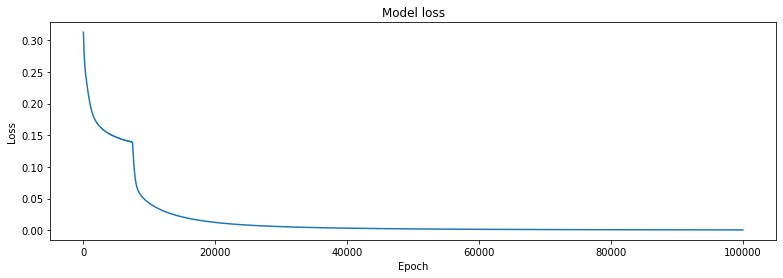

In [9]:
print(history.history.keys())

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [10]:
for i, l in enumerate(model.layers):
  if l.get_weights():
    arr2str = lambda y: '[%s]' % ', '.join('%0.9g' % x for x in y)
    w, b = l.get_weights()
    print("W{} = {}".format(i, '[%s]' % ', '.join(arr2str(y) for y in w)))
    print("B{} = {}".format(i, arr2str(b)))

W1 = [[-0.100219101, 0.0986418799, 0.0540673025], [-0.101571321, 0.055912815, -0.0540193357]]
B1 = [0.101785883, -0.0555998087, -7.84907461e-05]
W2 = [[-85.8035507], [-90.0149384], [87.0291138]]
B2 = [4.28154087]


In [13]:
W1 = [[-0.100219101, 0.0986418799, 0.0540673025], [-0.101571321, 0.055912815, -0.0540193357]]
B1 = [0.101785883, -0.0555998087, -7.84907461e-05]
W2 = [[-85.8035507], [-90.0149384], [87.0291138]]
B2 = [4.28154087]

In [14]:
for x in X:
  # First layer calculation
  L1 = np.dot(x, W1) + B1
  # Relu activation function
  X2 = np.maximum(L1, 0)
  # Second layer calculation
  L2 = np.dot(X2, W2) + B2
  # Sigmoid
  output = 1/(1+np.exp(-L2))
  print(output)

[0.01152039]
[0.98572624]
[0.99311345]
[0.00970005]
